# Introduction: Alzheimer's Disease Classification with Machine Learning

Alzheimer’s is the leading cause of dementia and a major health challenge worldwide. Early detection is critical but difficult due to subtle early symptoms and diagnostic complexity.

This notebook applies supervised machine learning to a clinical dataset of patient information, including demographics, lifestyle, and medical measurements.

We build and evaluate several classification models—including Logistic Regression, Random Forest, XGBoost, and Stacking—to identify the most effective approach for predicting Alzheimer’s diagnosis.

The workflow includes data preprocessing, EDA, model training, and performance comparison.

# Importing Libraries and Setting Up Environment

## Importing Libraries

In [ ]:
# --- 1. Data Handling & Analysis Libraries ---
import pandas as pd
import numpy as np
import time # To time our models

# --- 2. Data Visualization Libraries ---
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree # For visualizing decision trees

# --- 3. Preprocessing & Modeling Libraries ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# --- 4. Machine Learning Models ---
# Basic Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Ensemble Models (from your new code)
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, StackingClassifier
from xgboost import XGBClassifier

# --- 5. Model Evaluation Metrics ---
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report

# --- 6. Configuration and Settings ---
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
# plt.rcParams['figure.figsize'] = (12, 7)

print("Libraries updated and imported successfully!")

Libraries updated and imported successfully!


##  Load Dataset

In [2]:
# --- Load Dataset ---
# Read the Alzheimer's dataset into a pandas DataFrame
# Make sure the file path matches the dataset path in your Kaggle environment
alzheimers_df = pd.read_csv("data/alzheimers_disease_data.csv")

# Exploratory Data Analysis (EDA)

## Initial Data Exploration

### Overview

In [3]:
# Perform basic EDA to understand the dataset structure and data quality.
# .shape returns the number of rows and columns.
# .info() shows column names, data types, and non-null counts.
# .describe() gives summary statistics for numerical columns, rounded for readability.
# .isnull().sum() checks for missing values in each column.
# .duplicated().sum() counts duplicated rows to detect redundancy in the data.


In [4]:
# --- Initial Data Inspection and Quality Check ---

# Show the number of rows and columns
print("Dataset Shape:", alzheimers_df.shape)

Dataset Shape: (2149, 35)


In [5]:
# Show column names, data types, and non-null counts
print("\nDataset Info:")
alzheimers_df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 n

In [6]:
# Preview the first 5 rows
display(alzheimers_df.head())


PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.454356          6.310461     0.795498  ...                 0   

   BehavioralProblems       ADL  Confusion  Disorientation  \
0                   0  1.725883          0               0   
1                   0  2.592424          0               0   
2                   0  7.119548          0               1   
3                   1  6.481226          0               0   
4                   0  0.014691          0               0   

   PersonalityChanges  DifficultyCompletingTasks  Forgetfulness  Diagnosis  \
0                   0                          1              0          0   
1                   0                          0              1          0   
2                   0                          1              0          0   
3                   0                          0              0          0   
4                   1                          1              0          0   

   DoctorInCharge  
0       XXXConfid  
1       XXXConfid  
2       XXXConfid  
3       XXXConfid  
4       XXXConfid  

[5 rows x 35 columns]

In [7]:
# Summary statistics for numerical columns, rounded to 2 decimal places
print("\nDescriptive Statistics:")
display(alzheimers_df.describe().round(2))


Descriptive Statistics:


PatientID      Age   Gender  Ethnicity  EducationLevel      BMI  \
count    2149.00  2149.00  2149.00     2149.0         2149.00  2149.00   
mean     5825.00    74.91     0.51        0.7            1.29    27.66   
std       620.51     8.99     0.50        1.0            0.90     7.22   
min      4751.00    60.00     0.00        0.0            0.00    15.01   
25%      5288.00    67.00     0.00        0.0            1.00    21.61   
50%      5825.00    75.00     1.00        0.0            1.00    27.82   
75%      6362.00    83.00     1.00        1.0            2.00    33.87   
max      6899.00    90.00     1.00        3.0            3.00    39.99   

       Smoking  AlcoholConsumption  PhysicalActivity  DietQuality  ...  \
count  2149.00             2149.00           2149.00      2149.00  ...   
mean      0.29               10.04              4.92         4.99  ...   
std       0.45                5.76              2.86         2.91  ...   
min       0.00                0.00              0.00         0.01  ...   
25%       0.00                5.14              2.57         2.46  ...   
50%       0.00                9.93              4.77         5.08  ...   
75%       1.00               15.16              7.43         7.56  ...   
max       1.00               19.99              9.99        10.00  ...   

       FunctionalAssessment  MemoryComplaints  BehavioralProblems      ADL  \
count               2149.00           2149.00             2149.00  2149.00   
mean                   5.08              0.21                0.16     4.98   
std                    2.89              0.41                0.36     2.95   
min                    0.00              0.00                0.00     0.00   
25%                    2.57              0.00                0.00     2.34   
50%                    5.09              0.00                0.00     5.04   
75%                    7.55              0.00                0.00     7.58   
max                   10.00              1.00                1.00    10.00   

       Confusion  Disorientation  PersonalityChanges  \
count    2149.00         2149.00             2149.00   
mean        0.21            0.16                0.15   
std         0.40            0.37                0.36   
min         0.00            0.00                0.00   
25%         0.00            0.00                0.00   
50%         0.00            0.00                0.00   
75%         0.00            0.00                0.00   
max         1.00            1.00                1.00   

       DifficultyCompletingTasks  Forgetfulness  Diagnosis  
count                    2149.00        2149.00    2149.00  
mean                        0.16           0.30       0.35  
std                         0.37           0.46       0.48  
min                         0.00           0.00       0.00  
25%                         0.00           0.00       0.00  
50%                         0.00           0.00       0.00  
75%                         0.00           1.00       1.00  
max                         1.00           1.00       1.00  

[8 rows x 34 columns]

### Data Quality Checks

In [8]:
# Check for missing values in each column
print("MISSING VALUES CHECK")

missing_values = alzheimers_df.isnull().sum()
if missing_values.sum() == 0:
    print("No missing values")
else:
    print("Missing values:", missing_values)

MISSING VALUES CHECK
No missing values


In [9]:
# Check and count duplicate rows
print("DUPLICATE ROWS CHECK")

duplicated_values = alzheimers_df.duplicated().sum()
if duplicated_values.sum() == 0:
    print("No duplicated values")
else:
    print("duplicated values:", duplicated_values)
    df.drop_duplicates(inplace=True)

DUPLICATE ROWS CHECK
No duplicated values


### Outliers and Skewness Analysis

In [10]:
# Detect outliers in numerical features using the Interquartile Range (IQR) method
# A feature is considered to have outliers if any values lie outside the range [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
# For each feature in the list, calculate Q1, Q3, and IQR, then count how many values fall outside this range
# Store the outlier counts in a dictionary and convert it to a DataFrame for display

# --- Outlier Analysis using IQR Method ---

numerical_features = ['Age', 'BMI', 'SystolicBP', 'DiastolicBP','CholesterolTotal',
                      'CholesterolLDL', 'CholesterolHDL','CholesterolTriglycerides',
                      'MMSE', 'FunctionalAssessment']

print("--- Outlier Analysis using IQR Method ---")

outliers_dict = {}

for col in numerical_features:
    Q1 = alzheimers_df[col].quantile(0.25)
    Q3 = alzheimers_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = alzheimers_df[(alzheimers_df[col] < lower_bound) | (alzheimers_df[col] > upper_bound)]
    outliers_dict[col] = outliers.shape[0]

outliers_df = pd.DataFrame(list(outliers_dict.items()), columns=['Feature', 'NumberOfOutliers'])

outliers_df


--- Outlier Analysis using IQR Method ---


Feature  NumberOfOutliers
0                       Age                 0
1                       BMI                 0
2                SystolicBP                 0
3               DiastolicBP                 0
4          CholesterolTotal                 0
5            CholesterolLDL                 0
6            CholesterolHDL                 0
7  CholesterolTriglycerides                 0
8                      MMSE                 0
9      FunctionalAssessment                 0

In [11]:
# Calculate skewness for each numerical feature to assess distribution symmetry
# Positive skew: longer tail on the right; negative skew: longer tail on the left
# Use .skew() to compute skewness and .round(2) for clean output

# --- Skewness Analysis for Numerical Features ---

alzheimers_df[numerical_features].skew().round(2)

Age                         0.05
BMI                        -0.03
SystolicBP                  0.01
DiastolicBP                -0.05
CholesterolTotal           -0.02
CholesterolLDL              0.04
CholesterolHDL              0.04
CholesterolTriglycerides   -0.03
MMSE                        0.03
FunctionalAssessment       -0.03
dtype: float64

## Data Visualizations

### Target Distribution

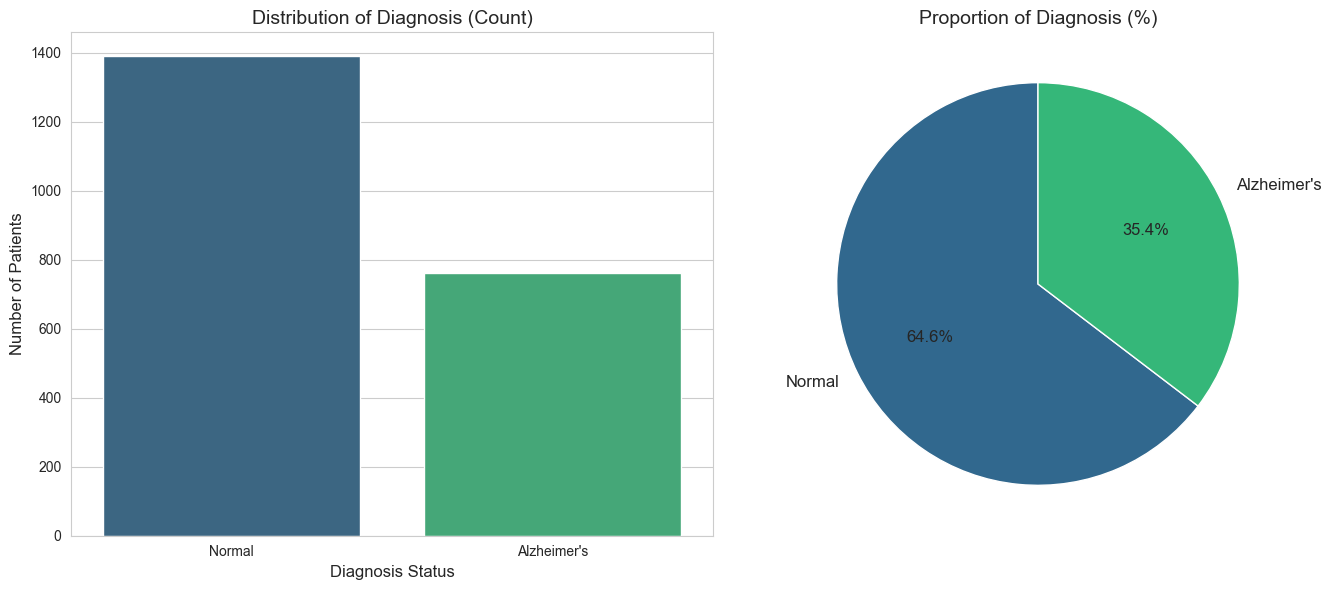

In [12]:
# Visualize the distribution of the target variable 'Diagnosis' to assess class balance
# Maps binary values to labels, then shows both absolute counts and proportions using countplot and pie chart
# Helps determine whether class imbalance needs to be addressed during modeling

# --- Visual Analysis of the Target Variable ('Diagnosis') ---

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

diagnosis_labels = alzheimers_df['Diagnosis'].map({0: 'Normal', 1: "Alzheimer's"})

# Left: count plot of diagnosis classes
sns.countplot(x=diagnosis_labels, ax=ax[0], palette='viridis')
ax[0].set_title('Distribution of Diagnosis (Count)', fontsize=14)
ax[0].set_xlabel('Diagnosis Status', fontsize=12)
ax[0].set_ylabel('Number of Patients', fontsize=12)

# Right: pie chart of diagnosis class proportions
ax[1].pie(
    alzheimers_df['Diagnosis'].value_counts(),
    labels=['Normal', "Alzheimer's"],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('viridis', 2),
    textprops={'fontsize': 12}
)
ax[1].set_title('Proportion of Diagnosis (%)', fontsize=14)

plt.tight_layout()
plt.show()


### Bivariate Categorical Analysis

--- Bivariate Analysis: Key Features vs. Diagnosis ---


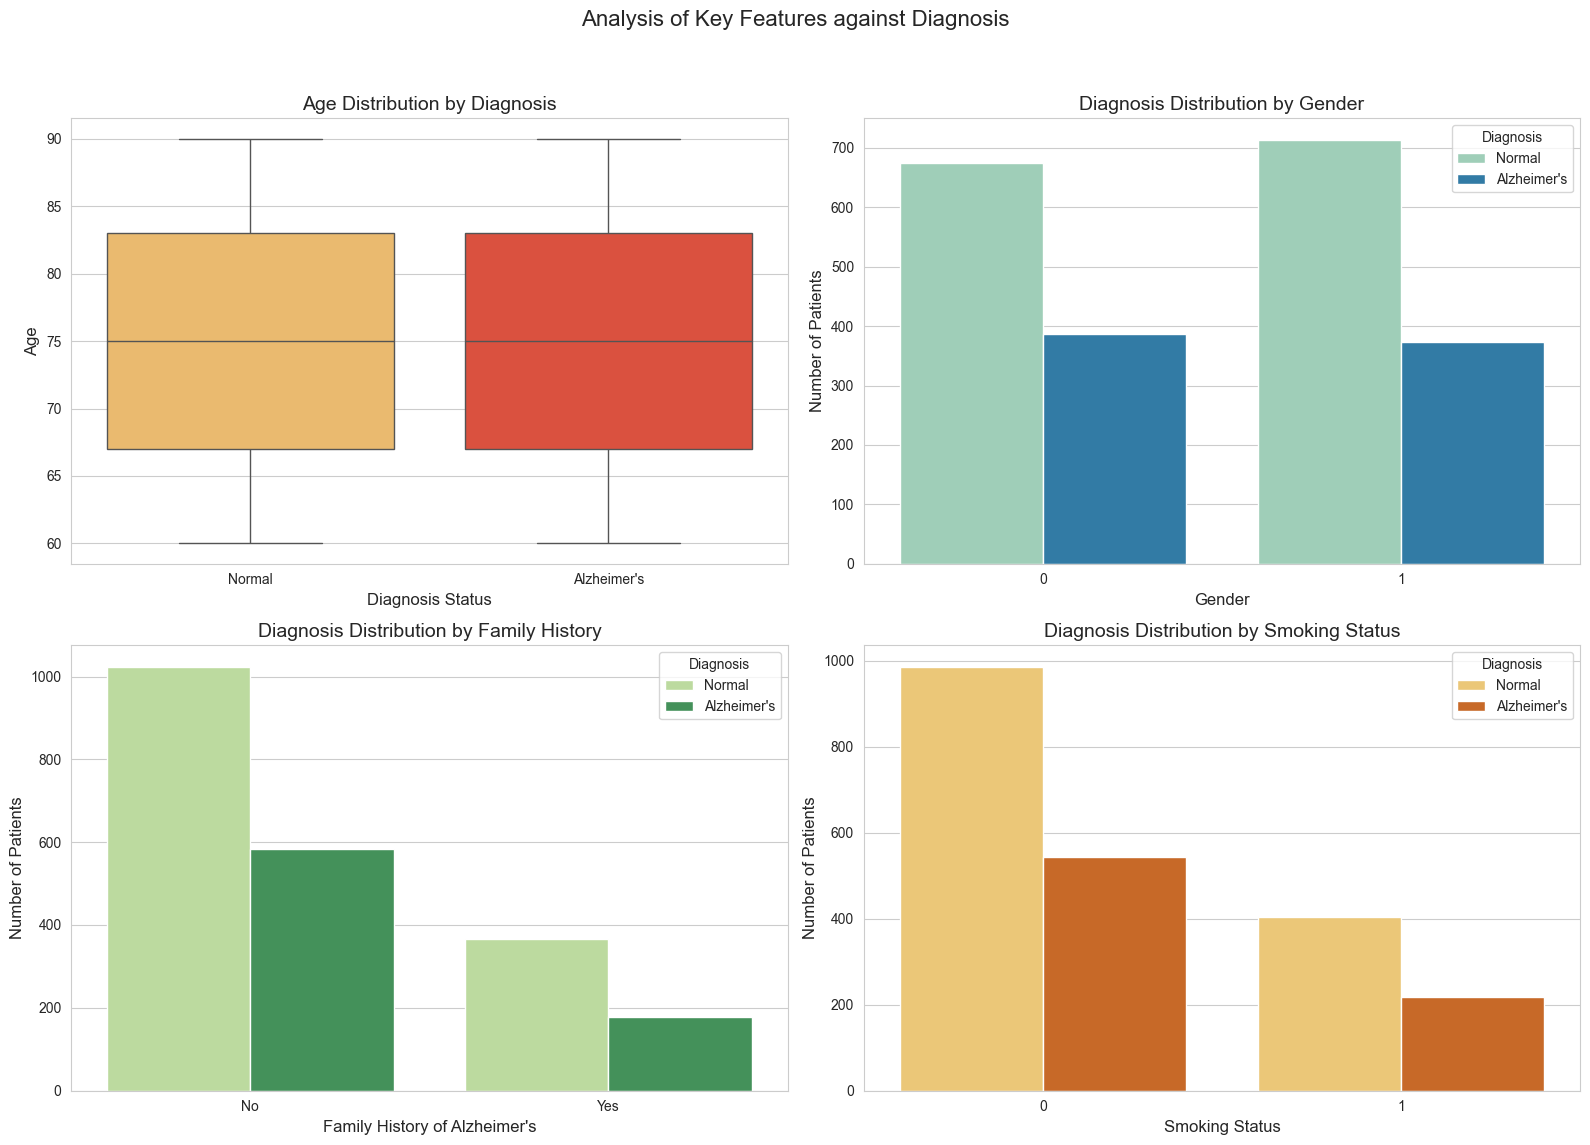

In [13]:
# Visualize how selected features relate to the target variable 'Diagnosis'
# Includes one boxplot for the continuous feature (Age) and three countplots for categorical features (Gender, FamilyHistoryAlzheimers, Smoking)
# Helps identify visible patterns or class differences across these predictors

# --- Bivariate Analysis: Key Features vs. Diagnosis ---
print("--- Bivariate Analysis: Key Features vs. Diagnosis ---")

fig, ax = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Analysis of Key Features against Diagnosis', fontsize=16)

diagnosis_labels = alzheimers_df['Diagnosis'].map({0:'Normal', 1:"Alzheimer's"})

# Age vs. Diagnosis (Boxplot)
sns.boxplot(x=diagnosis_labels, y=alzheimers_df['Age'], ax=ax[0, 0], palette='YlOrRd')
ax[0, 0].set_title('Age Distribution by Diagnosis', fontsize=14)
ax[0, 0].set_xlabel('Diagnosis Status', fontsize=12)
ax[0, 0].set_ylabel('Age', fontsize=12)

# Gender vs. Diagnosis (Countplot)
sns.countplot(x=alzheimers_df['Gender'], hue=diagnosis_labels, ax=ax[0, 1], palette='YlGnBu')
ax[0, 1].set_title('Diagnosis Distribution by Gender', fontsize=14)
ax[0, 1].set_xlabel('Gender', fontsize=12)
ax[0, 1].set_ylabel('Number of Patients', fontsize=12)

# Family History vs. Diagnosis (Countplot)
sns.countplot(x=alzheimers_df['FamilyHistoryAlzheimers'], hue=diagnosis_labels, ax=ax[1, 0], palette='YlGn')
ax[1, 0].set_title('Diagnosis Distribution by Family History', fontsize=14)
ax[1, 0].set_xlabel("Family History of Alzheimer's", fontsize=12)
ax[1, 0].set_ylabel('Number of Patients', fontsize=12)
ax[1, 0].set_xticklabels(['No', 'Yes'])

# Smoking Status vs. Diagnosis (Countplot)
sns.countplot(x=alzheimers_df['Smoking'], hue=diagnosis_labels, ax=ax[1, 1], palette='YlOrBr')
ax[1, 1].set_title('Diagnosis Distribution by Smoking Status', fontsize=14)
ax[1, 1].set_xlabel('Smoking Status', fontsize=12)
ax[1, 1].set_ylabel('Number of Patients', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Numerical Feature Distribution by Diagnosis

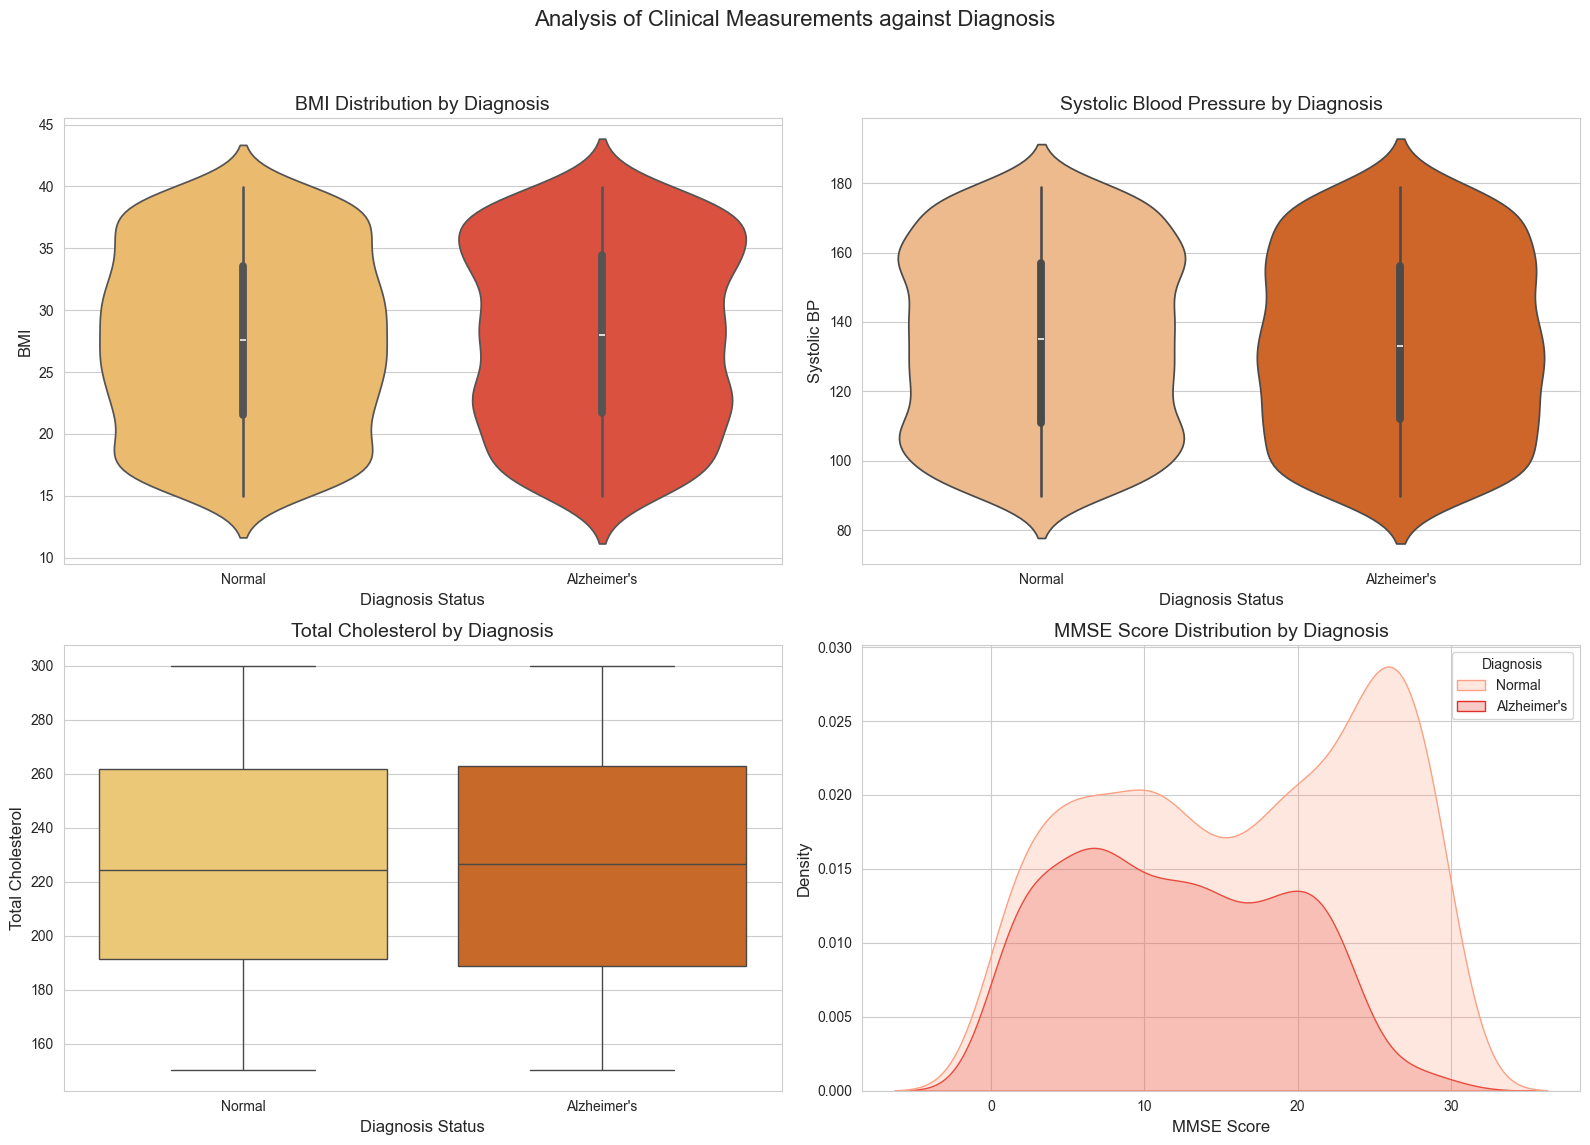

In [14]:
# Visualize how key clinical measurements relate to the diagnosis variable
# Includes violin plots for BMI and Systolic BP, a boxplot for Total Cholesterol, and a KDE plot for MMSE scores
# Helps evaluate which clinical features show clear separation between Alzheimer's and normal patients

# --- Bivariate Analysis: Clinical Measurements vs. Diagnosis ---

fig, ax = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Analysis of Clinical Measurements against Diagnosis', fontsize=16)

diagnosis_labels = alzheimers_df['Diagnosis'].map({0: 'Normal', 1: "Alzheimer's"})

# BMI vs. Diagnosis (Violin Plot)
sns.violinplot(x=diagnosis_labels, y=alzheimers_df['BMI'], ax=ax[0, 0], palette='YlOrRd')
ax[0, 0].set_title('BMI Distribution by Diagnosis', fontsize=14)
ax[0, 0].set_xlabel('Diagnosis Status', fontsize=12)
ax[0, 0].set_ylabel('BMI', fontsize=12)

# Systolic BP vs. Diagnosis (Violin Plot)
sns.violinplot(x=diagnosis_labels, y=alzheimers_df['SystolicBP'], ax=ax[0, 1], palette='Oranges')
ax[0, 1].set_title('Systolic Blood Pressure by Diagnosis', fontsize=14)
ax[0, 1].set_xlabel('Diagnosis Status', fontsize=12)
ax[0, 1].set_ylabel('Systolic BP', fontsize=12)

# Total Cholesterol vs. Diagnosis (Box Plot)
sns.boxplot(x=diagnosis_labels, y=alzheimers_df['CholesterolTotal'], ax=ax[1, 0], palette='YlOrBr')
ax[1, 0].set_title('Total Cholesterol by Diagnosis', fontsize=14)
ax[1, 0].set_xlabel('Diagnosis Status', fontsize=12)
ax[1, 0].set_ylabel('Total Cholesterol', fontsize=12)

# MMSE Score vs. Diagnosis (KDE Plot)
sns.kdeplot(data=alzheimers_df, x='MMSE', hue=diagnosis_labels, fill=True, ax=ax[1, 1], palette='Reds')
ax[1, 1].set_title('MMSE Score Distribution by Diagnosis', fontsize=14)
ax[1, 1].set_xlabel('MMSE Score', fontsize=12)
ax[1, 1].set_ylabel('Density', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Correlation Analysis

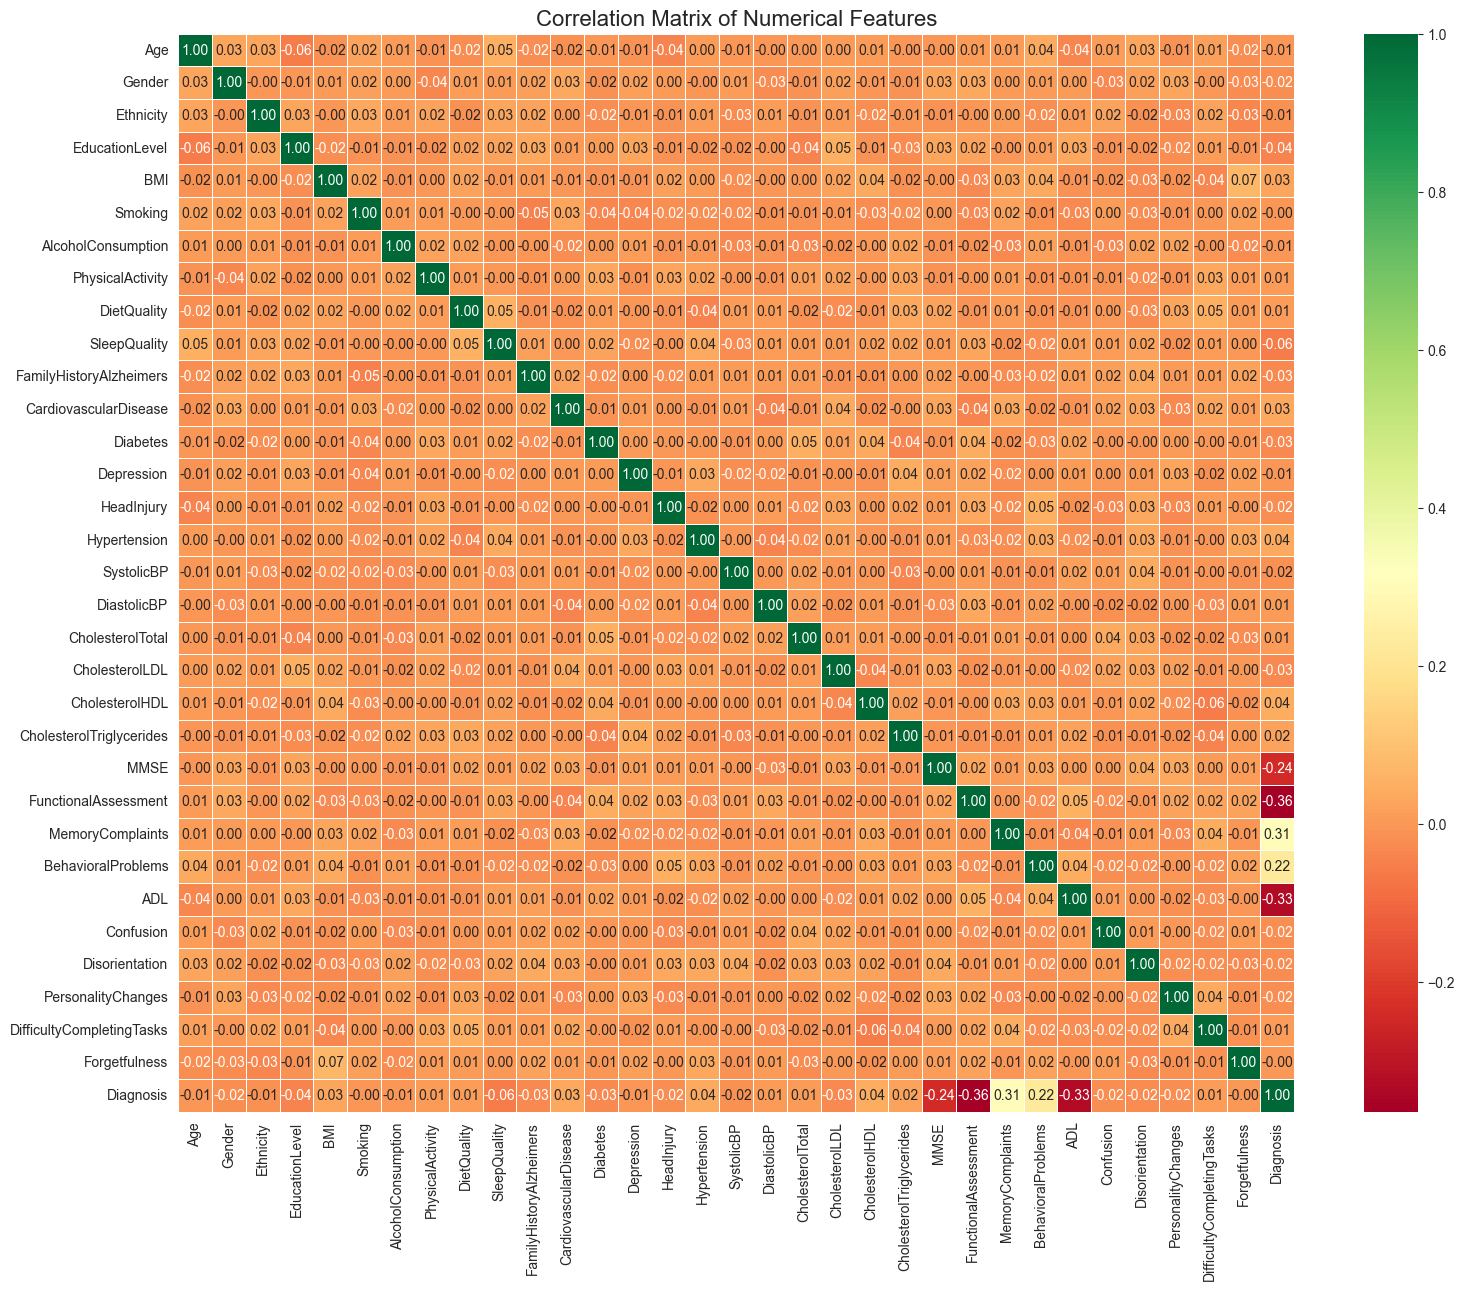

In [15]:
# Create a heatmap to visualize pairwise correlations between numerical features
# Useful for detecting strong linear relationships and potential multicollinearity

# --- Multivariate Analysis: Correlation Matrix ---

# Compute correlation matrix after dropping 'PatientID'
corr_matrix = alzheimers_df.select_dtypes(include=np.number).drop(columns=['PatientID']).corr()

# Set figure size
plt.figure(figsize=(18, 14))

# Draw heatmap with correlation values
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='RdYlGn',
    fmt='.2f',
    linewidths=.5
)

# Set title
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()


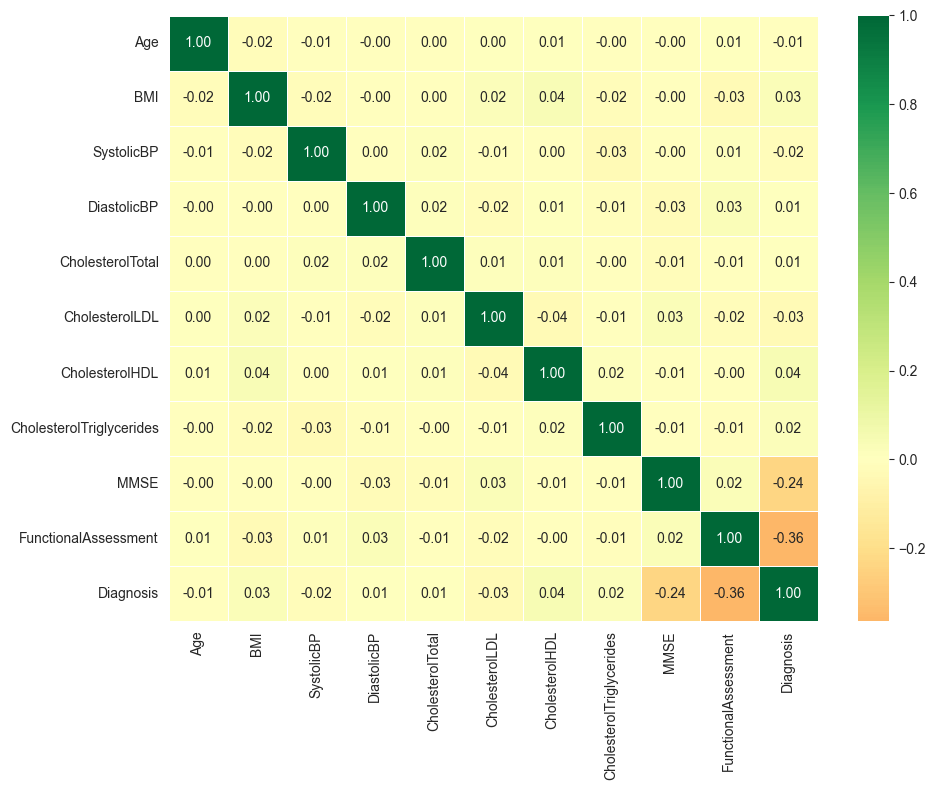

In [16]:
# Correlation heatmap focused on features relevant to 'Diagnosis'
# Highlights which variables are most linearly associated with the target

# --- Focused Correlation Analysis with Target Variable ---

# Select key numerical features including the target
heatmap_numerical_features = [
    'Age', 'BMI', 'SystolicBP', 'DiastolicBP',
    'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
    'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'Diagnosis'
]

# Compute correlation matrix for the selected features
corr_matrix = alzheimers_df[heatmap_numerical_features].corr()

# Set figure size
plt.figure(figsize=(10, 8))

# Draw heatmap
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='RdYlGn',
    fmt='.2f',
    linewidths=0.5,
    center=0
)

plt.tight_layout()
plt.show()


### Feature Distributions

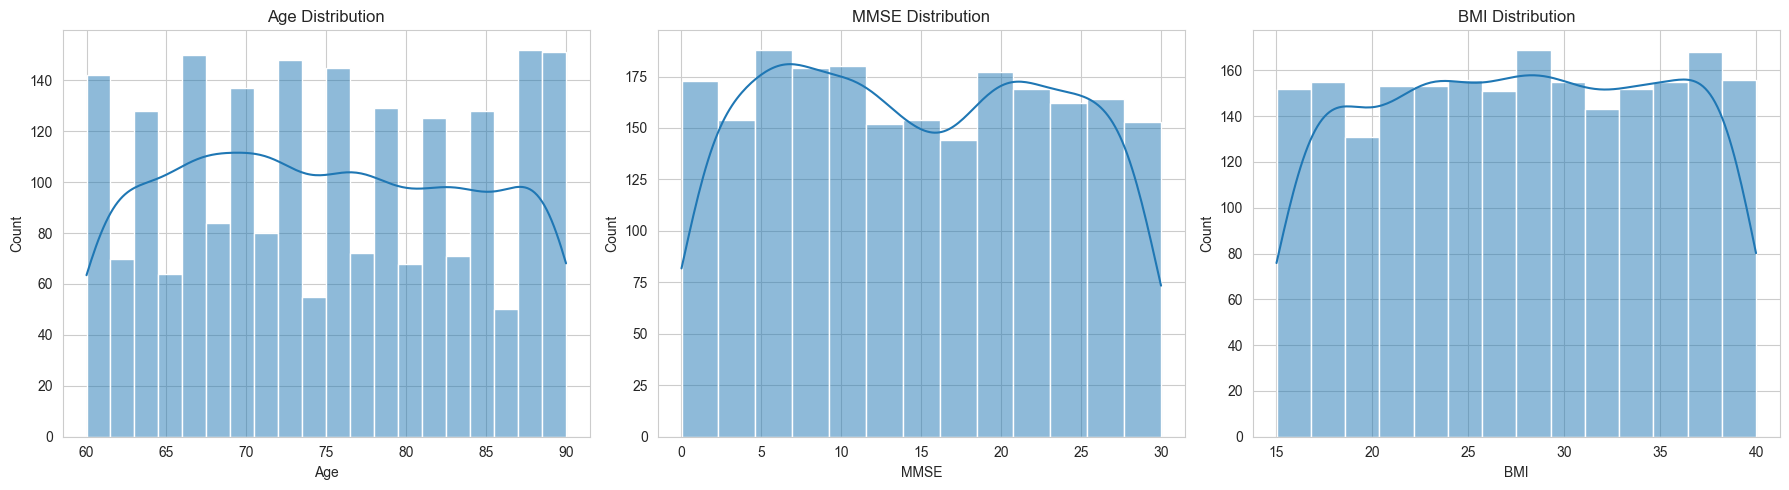

In [17]:
# Plot distribution of individual features to assess their shape and spread

# --- Univariate Distributions of Key Numerical Features ---

# Create three side-by-side subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Age
sns.histplot(alzheimers_df['Age'], kde=True, bins=20, ax=ax[0])
ax[0].set_title('Age Distribution')

# MMSE
sns.histplot(alzheimers_df['MMSE'], kde=True, ax=ax[1])
ax[1].set_title("MMSE Distribution")

# BMI
sns.histplot(alzheimers_df['BMI'], kde=True, ax=ax[2])
ax[2].set_title("BMI Distribution")

# Ensure layout is clean
plt.tight_layout()
plt.show()


### Pairwise Relationships

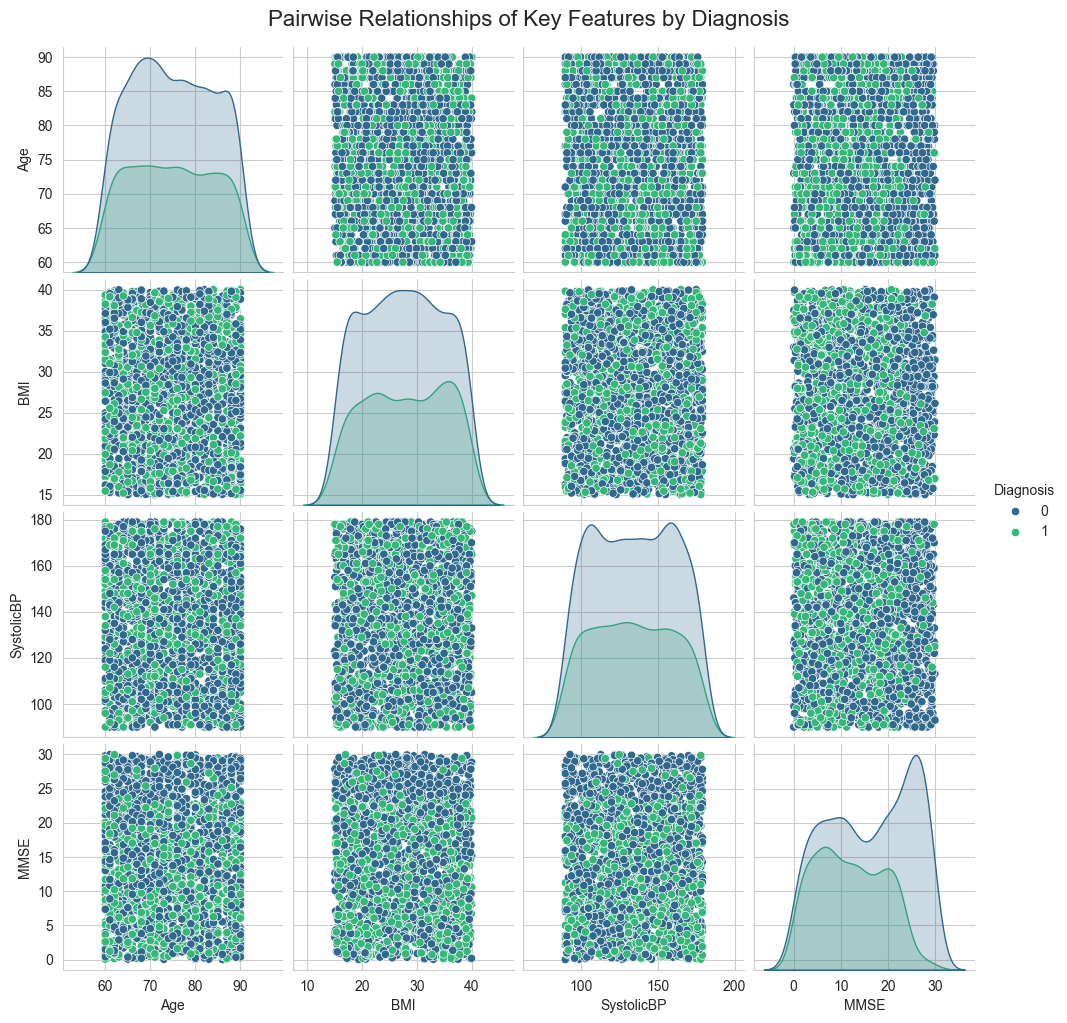

In [18]:
# Pairplot to explore relationships between key features and Diagnosis

# Select important numerical features and the target
pairplot_features = ['Age', 'BMI', 'SystolicBP', 'MMSE', 'Diagnosis']

# Plot pairwise relationships, colored by Diagnosis
sns.pairplot(alzheimers_df[pairplot_features], hue='Diagnosis', palette='viridis')

# Add title
plt.suptitle('Pairwise Relationships of Key Features by Diagnosis', y=1.02, fontsize=16)
plt.show()


# Data Preprocessing

## Feature Selection

In [19]:
# These columns are unique identifiers for patients and doctors.
# They don't carry any statistical or predictive value for machine learning.
# Keeping them may introduce noise or lead to overfitting.
# Dropping them ensures the model focuses only on meaningful features.
alzheimers_df.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)

In [20]:
# Define features and target for supervised learning

# X contains all input features except the target
X = alzheimers_df.drop(['Diagnosis'], axis=1)

# y contains the target variable (Diagnosis)
y = alzheimers_df['Diagnosis']

## Feature Engineering

In [21]:
# Define a list of numerical features.
# These are continuous variables that typically need scaling before training a model.
numerical_features = ['Age', 'BMI', 'SystolicBP', 'DiastolicBP',
                      'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
                      'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment']

# Define categorical features programmatically.
# This includes any column in X that is not in the numerical_features list.
# These features are already encoded and won't need scaling.
categorical_features = [col for col in X.columns if col not in numerical_features]


## Data Splitting

In [22]:
# Split the dataset into training and testing sets to evaluate model performance on unseen data.
# 80% of the data is used for training, 20% for testing.
# Stratifying by 'y' preserves the target class distribution in both sets.
# Setting random_state=42 ensures the split is reproducible.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Display the shapes of the resulting datasets to confirm the split.
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1719, 32), (430, 32), (1719,), (430,))

## Feature Scaling

In [23]:
# Build a preprocessing pipeline that scales numerical features while leaving categorical features unchanged.
# ColumnTransformer applies StandardScaler only to numerical columns listed in numerical_features.
# remainder='passthrough' ensures categorical features remain intact without transformation.
CT = ColumnTransformer(
    transformers=[('num', StandardScaler(), numerical_features)],
    remainder='passthrough')

In [24]:
# Apply preprocessing pipeline to training data: fit scaler and transform.
X_train = CT.fit_transform(X_train)

# Apply the same scaling to testing data without refitting.
X_test = CT.transform(X_test)


# Classification Models

## Logistic Regression Model

Accuracy: 81.3953488372093
Training Time: 0.015974760055541992
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       278
           1       0.74      0.74      0.74       152

    accuracy                           0.81       430
   macro avg       0.80      0.80      0.80       430
weighted avg       0.81      0.81      0.81       430



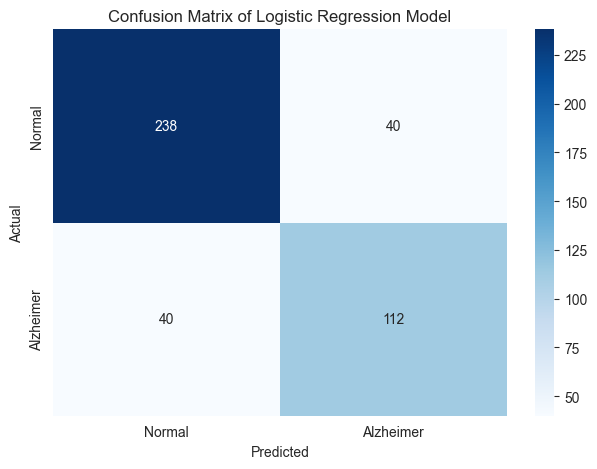

In [25]:
# GOAL:
# The goal of this code is to train, evaluate, and visualize the performance of a Logistic Regression model.
# This serves as a baseline model to see how a simple, linear classifier performs on the preprocessed data.
# The evaluation includes key metrics like accuracy, a detailed classification report, and a confusion matrix for visual inspection of its predictive accuracy.

# EXPLANATION:
# The code first initializes a `LogisticRegression` model with specific parameters for reproducibility and convergence.
# It then measures the time taken to train the model using `time.time()`. The `.fit()` method trains the model on the preprocessed training data.
# After training, `.predict()` is used to make predictions on the unseen test data.
# The model's performance is then evaluated using `accuracy_score` and `classification_report`, which provides precision, recall, and f1-score.
# Finally, a `confusion_matrix` is generated and visualized as a heatmap, which shows the counts of correct and incorrect predictions for each class (True Positives, False Positives, True Negatives, False Negatives).

# --- Train and Evaluate Logistic Regression Model ---

# Initialize the Logistic Regression model with specified parameters for reproducibility.
# 'solver' is the algorithm to use for optimization.
# 'max_iter' is the maximum number of iterations for the solver to converge.
logistic_model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=0)

# Record the start time before training the model.
start_time = time.time()
# Fit the model to the training data.
logistic_model.fit(X_train, y_train)
# Calculate the total training time.
train_time = time.time() - start_time

# Use the trained model to make predictions on the test set.
y_pred = logistic_model.predict(X_test)

# Print the model's accuracy, formatted as a percentage.
print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
# Print the time it took to train the model.
print("Training Time:", train_time)
# Print a detailed classification report.
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate the confusion matrix to compare actual vs. predicted labels.
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a seaborn heatmap.
# 'annot=True' displays the counts in each cell.
# 'fmt='d'' formats the numbers as integers.
# 'xticklabels' and 'yticklabels' set the labels for the classes.
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Alzheimer'],
            yticklabels=['Normal', 'Alzheimer'])
# Set the labels for the axes.
plt.xlabel('Predicted')
plt.ylabel('Actual')
# Set the title for the plot.
plt.title('Confusion Matrix of Logistic Regression Model')

# Adjust layout and display the plot.
plt.tight_layout()
plt.show()

## Support Vector Machine Model (SVM)

Accuracy: 82.09302325581396
Training Time: 0.3814723491668701
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       278
           1       0.75      0.74      0.74       152

    accuracy                           0.82       430
   macro avg       0.80      0.80      0.80       430
weighted avg       0.82      0.82      0.82       430



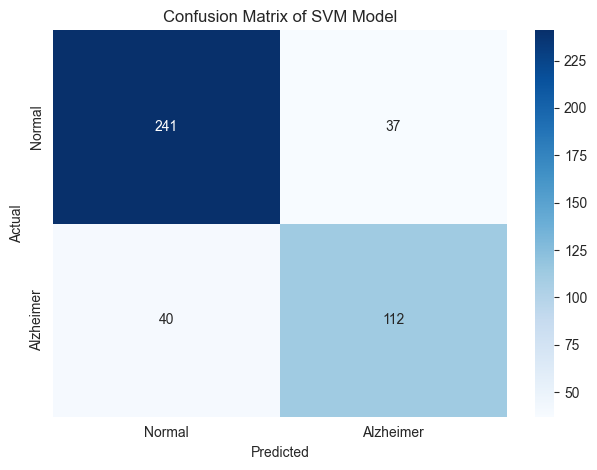

In [26]:
# GOAL:
# this code trains and evaluates a Support Vector Machine (SVM) classifier with a linear kernel on the dataset.
# it measures how well the model separates the 'Normal' and 'Alzheimer's' classes and reports its performance
# The performance is assessed using standard metrics to see how well it can distinguish between 'Normal' and 'Alzheimer's' cases.

# EXPLANATION:
# The code initializes a Support Vector Classifier (`SVC`) with a `kernel='linear'`, which means it will try to find a linear hyperplane to separate the classes.
# It then fits the model on the training data while timing the process.
# Predictions are made on the test set, and these predictions are compared against the true labels (`y_test`) to calculate the accuracy, generate a detailed classification report, and create a confusion matrix.
# The confusion matrix is then visualized as a heatmap for an intuitive understanding of the model's predictive performance.

# --- Train and Evaluate Support Vector Machine (SVM) Model ---

# Initialize the Support Vector Machine (SVM) model with a linear kernel.
svm_model = SVC(kernel='linear')

# Record the start time.
start_time = time.time()
# Fit the SVM model to the training data.
svm_model.fit(X_train, y_train)
# Calculate the total training time.
train_time = time.time() - start_time

# Use the trained model to make predictions on the test data.
y_pred = svm_model.predict(X_test)

# Print the accuracy of the model as a percentage.
print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
# Print the time taken to train the model.
print("Training Time:", train_time)
# Print the detailed classification report (precision, recall, f1-score).
print("Classification Report:\n", classification_report(y_test, y_pred))

# Compute the confusion matrix.
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a seaborn heatmap.
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Alzheimer'],
            yticklabels=['Normal', 'Alzheimer'])
# Set the x and y axis labels.
plt.xlabel('Predicted')
plt.ylabel('Actual')
# Set the title of the plot.
plt.title('Confusion Matrix of SVM Model')

# Adjust layout and display the plot.
plt.tight_layout()
plt.show()

## K-Nearest Neighbors Model (KNN)

Accuracy: 74.65116279069768
Training Time: 0.007633686065673828
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.89      0.82       278
           1       0.71      0.48      0.57       152

    accuracy                           0.75       430
   macro avg       0.73      0.69      0.70       430
weighted avg       0.74      0.75      0.73       430



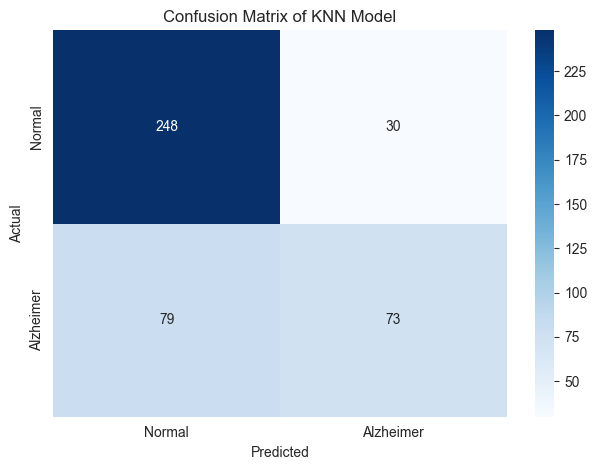

In [27]:
# GOAL:
# The purpose of this code is to train and evaluate a K-Nearest Neighbors (KNN) classifier.
# KNN is a non-parametric, instance-based learning algorithm. Its performance is evaluated to see how it compares to other models in classifying Alzheimer's cases.
# The critical hyperparameter 'k' is set to 19 here.

# EXPLANATION:
# The KNeighborsClassifier is initialized with n_neighbors=19, meaning classification is based on the majority vote among the 19 nearest neighbors.
# The model is trained on the training set while measuring training time.
# Predictions on the test set are used to calculate accuracy and generate a classification report.
# A confusion matrix is computed and displayed as a heatmap to visualize the prediction results clearly.

# --- Train and Evaluate K-Nearest Neighbors (KNN) Model ---

knn_model = KNeighborsClassifier(n_neighbors=19)

start_time = time.time()
knn_model.fit(X_train, y_train)
train_time = time.time() - start_time

y_pred = knn_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
print("Training Time:", train_time)
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Alzheimer'],
            yticklabels=['Normal', 'Alzheimer'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of KNN Model')

plt.tight_layout()
plt.show()


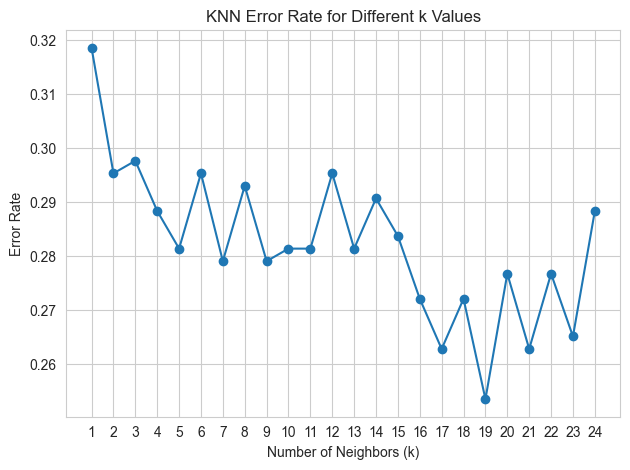

In [28]:
# GOAL:
# Identify the optimal 'k' (number of neighbors) for the KNN model by testing a range of k values.
# Visualize error rates to find the k with the lowest classification error.

# EXPLANATION:
# Iterate over k values from 1 to 24.
# For each k, train a KNN model, predict on the test set, and calculate the error rate (1 - accuracy).
# Store error rates, then plot them against k values.
# The plot helps detect the "elbow point" where error is minimized before leveling off.

k_values = list(range(1, 25))
errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    errors.append(1 - accuracy_score(y_test, y_pred_k))

plt.plot(k_values, errors, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Error Rate")
plt.title("KNN Error Rate for Different k Values")
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()


## Decision Tree Model

Accuracy: 93.02325581395348
Training Time: 0.035887718200683594
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       278
           1       0.90      0.91      0.90       152

    accuracy                           0.93       430
   macro avg       0.92      0.93      0.92       430
weighted avg       0.93      0.93      0.93       430



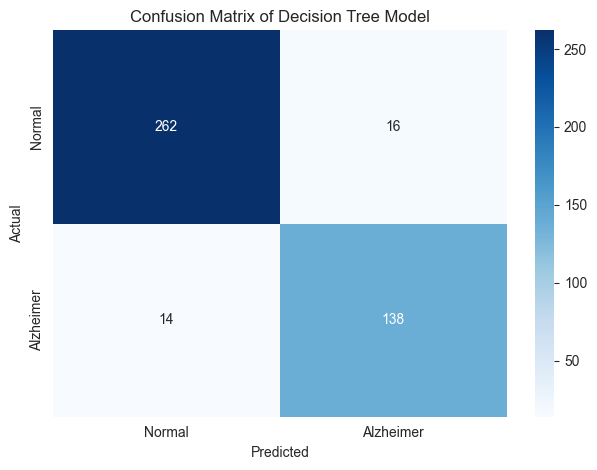

In [29]:
# GOAL:
# Train and evaluate a Decision Tree classifier with controlled complexity (max_depth=4).
# Assess its performance on classifying Alzheimer's cases to balance interpretability and accuracy.

# EXPLANATION:
# Initialize DecisionTreeClassifier with 'entropy' criterion for splits based on information gain.
# Limit tree depth to 4 levels to prevent overfitting.
# Train the model and measure training time.
# Predict on test data, then evaluate using accuracy, classification report, and confusion matrix.
# Visualize confusion matrix as a heatmap to analyze prediction correctness.

DT_model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

start_time = time.time()
DT_model.fit(X_train, y_train)
train_time = time.time() - start_time

y_pred = DT_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
print("Training Time:", train_time)
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Alzheimer'],
            yticklabels=['Normal', 'Alzheimer'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Decision Tree Model')

plt.tight_layout()
plt.show()


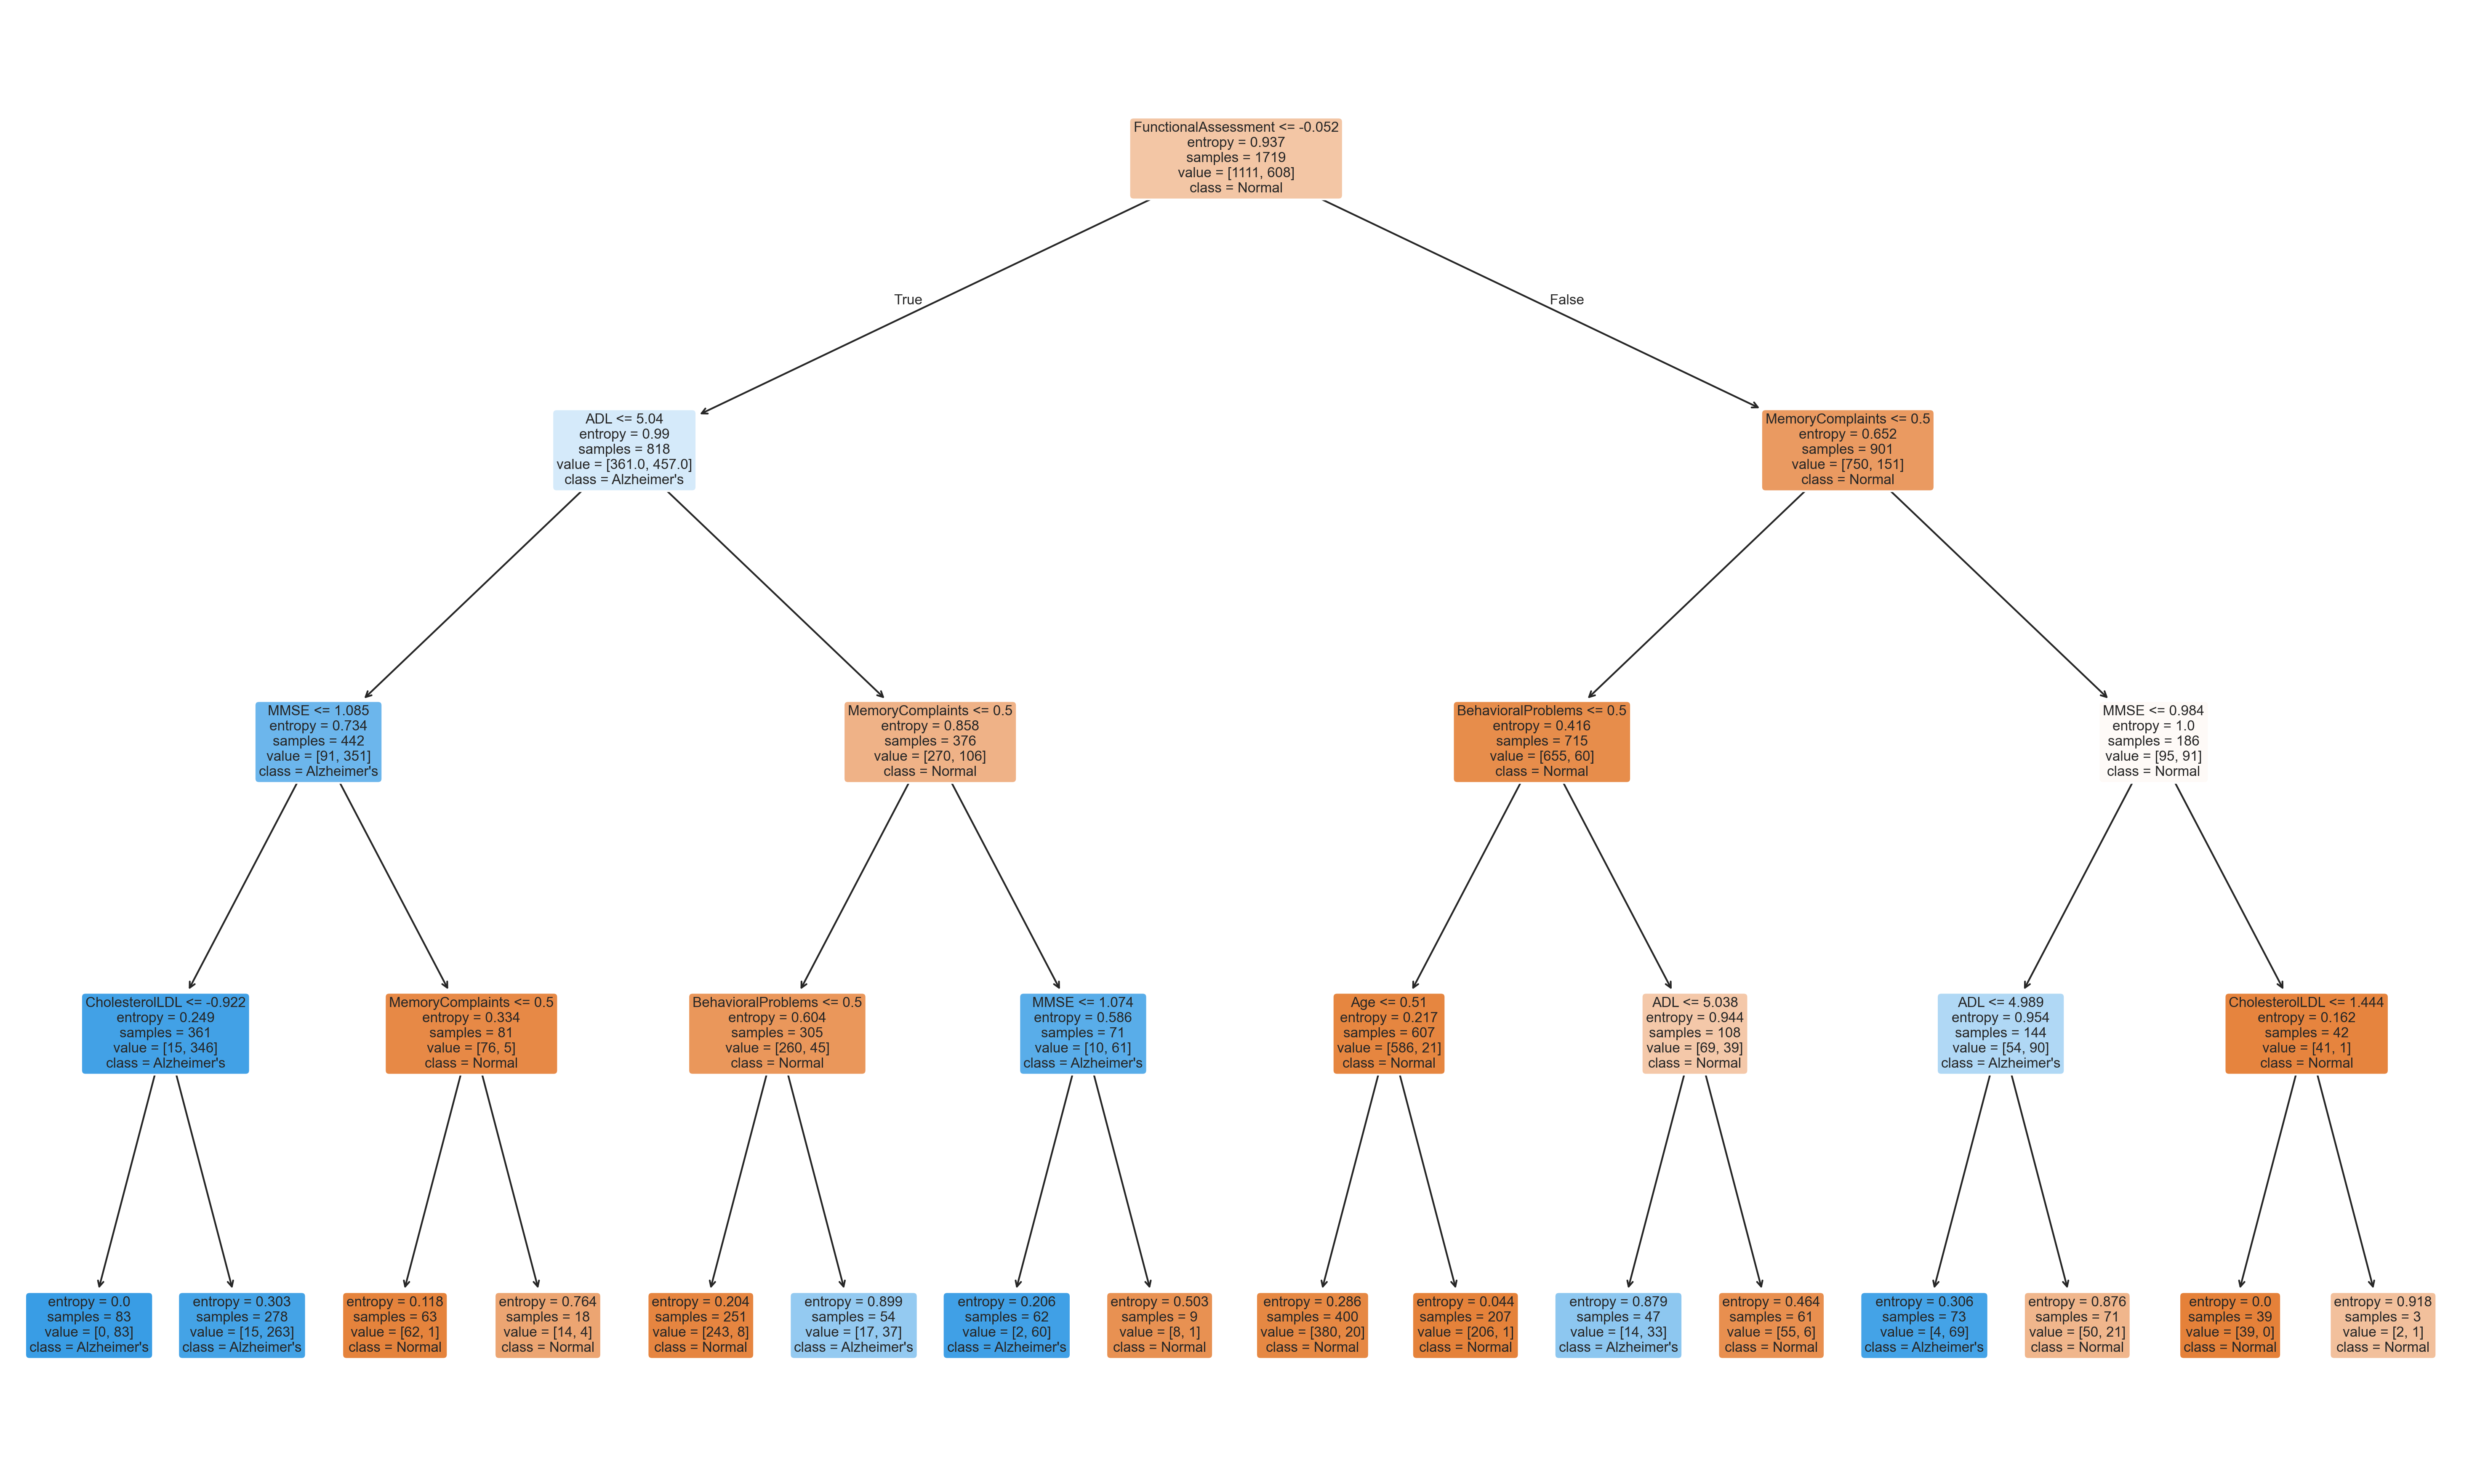

In [30]:
# GOAL:
# Visualize the trained Decision Tree to inspect its learned rules and feature splits.
# Enables interpretation of which features influence the classification and the thresholds used.

# EXPLANATION:
# Use scikit-learn's plot_tree to render the tree structure.
# Feature names must match the column order after preprocessing (numerical first, then categorical).
# Nodes are colored by majority class for clarity.
# Class names correspond to target labels (0 = Normal, 1 = Alzheimer's).
# Large figure size and high dpi ensure readability of the plot.

plt.figure(figsize=(25, 15), dpi=300)

ordered_feature_names = numerical_features + categorical_features

plot_tree(DT_model,
          feature_names=ordered_feature_names,
          class_names=['Normal', "Alzheimer's"],
          filled=True,
          rounded=True,
          fontsize=8)

plt.show()


## Random Forest Model

Accuracy: 94.65116279069767
Training Time: 1.0927248001098633
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       278
           1       0.94      0.90      0.92       152

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.94       430
weighted avg       0.95      0.95      0.95       430



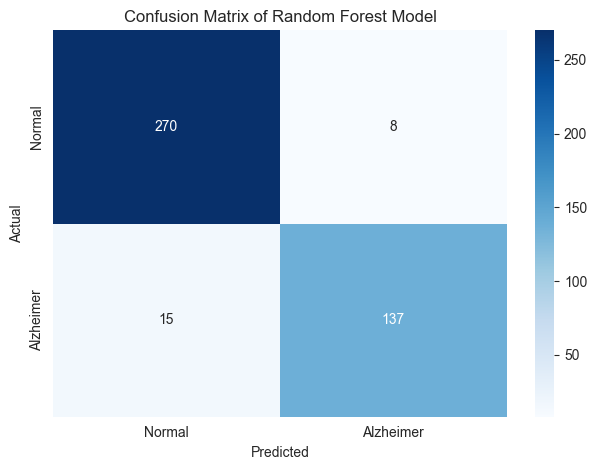

In [31]:
# GOAL:
# Train and evaluate a Random Forest classifier to improve accuracy and generalization by aggregating many decision trees.

# EXPLANATION:
# Initialize RandomForestClassifier with 200 trees using Gini impurity for splits.
# Fit the model on training data, measure training time.
# Predict on test data and evaluate using accuracy, classification report, and confusion matrix.
# Visualize confusion matrix as a heatmap for clear performance insight.

RF_model = RandomForestClassifier(n_estimators=200, criterion='gini', random_state=42)

start_time = time.time()
RF_model.fit(X_train, y_train)
train_time = time.time() - start_time

y_pred = RF_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
print("Training Time:", train_time)
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Alzheimer'],
            yticklabels=['Normal', 'Alzheimer'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Random Forest Model')

plt.tight_layout()
plt.show()


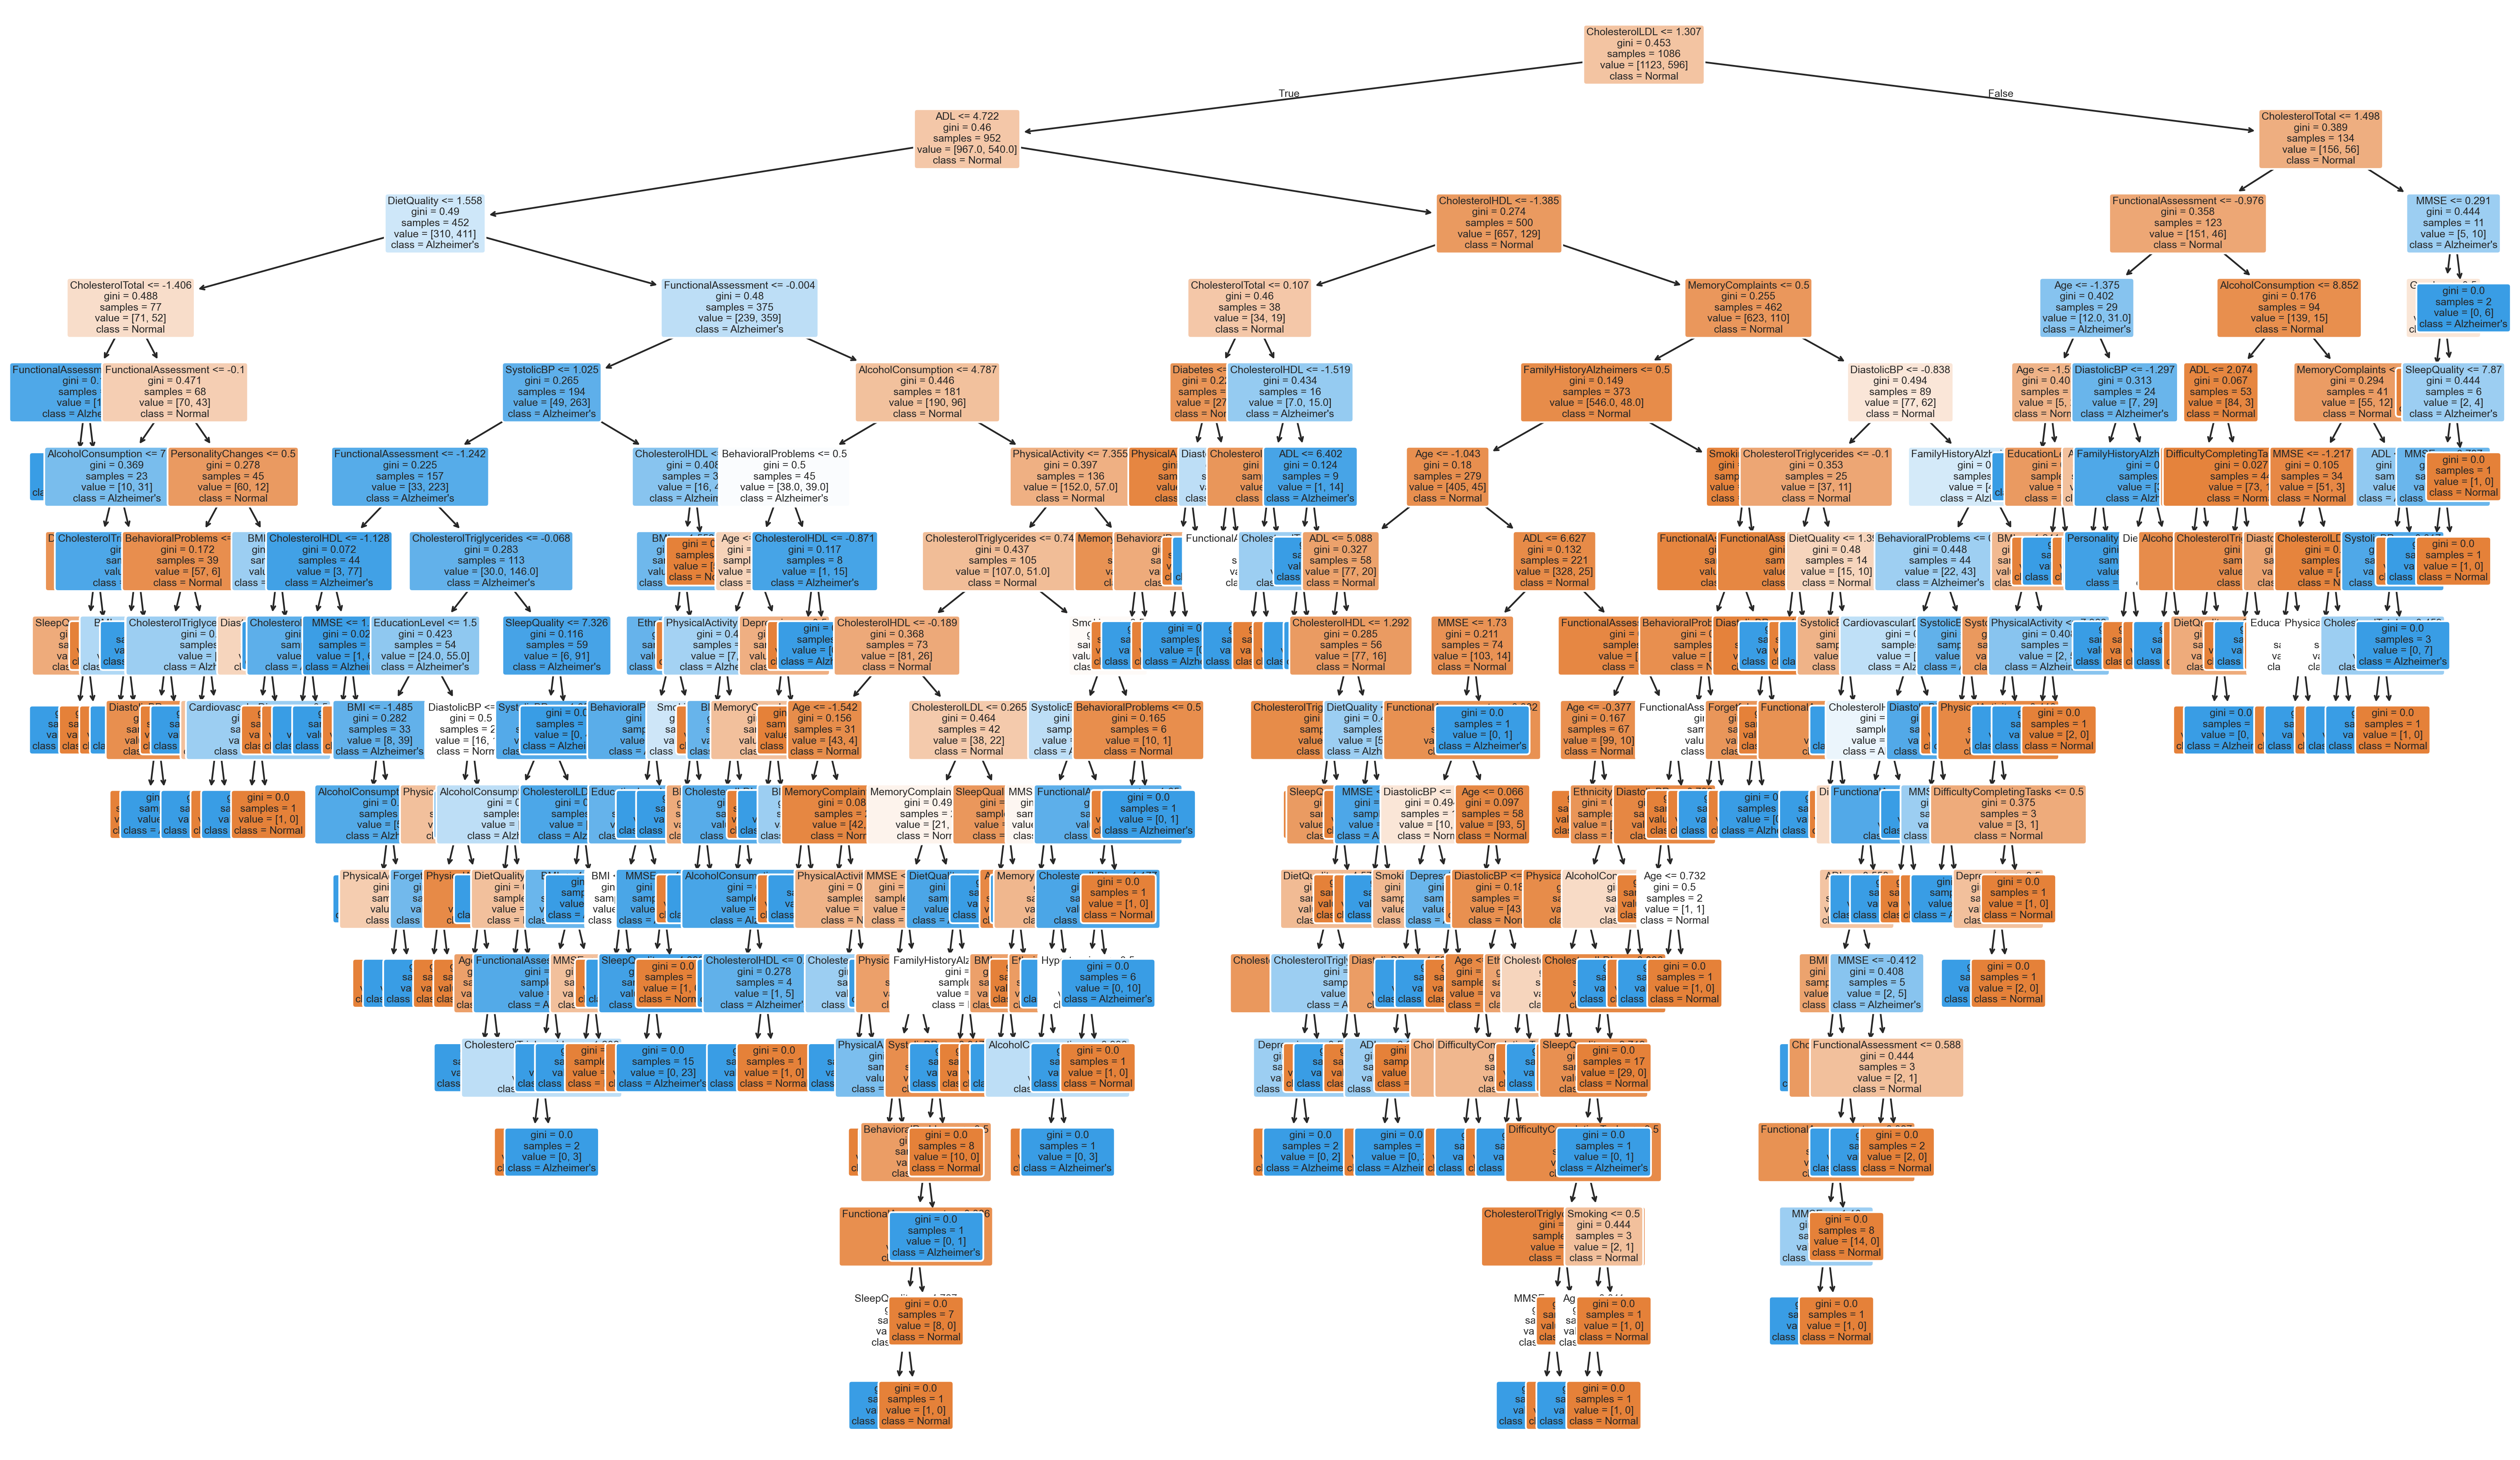

In [32]:
# GOAL:
# Visualize one individual decision tree from the Random Forest to understand its structure and important splits.

# EXPLANATION:
# Access the first tree in the ensemble using RF_model.estimators_[0].
# Use plot_tree with the correct feature names order (numerical then categorical) for accurate labels.
# Set figure size and dpi high to make the complex tree readable.
# Use filled and rounded nodes for clarity and set font size smaller to fit the plot.

plt.figure(figsize=(25, 15), dpi=300)

ordered_feature_names = numerical_features + categorical_features

plot_tree(RF_model.estimators_[0],
          feature_names=ordered_feature_names,
          class_names=['Normal', "Alzheimer's"],
          filled=True,
          rounded=True,
          fontsize=6)

plt.show()


## AdaBoost Model

Accuracy: 92.55813953488372
Training Time: 0.3586709499359131
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       278
           1       0.92      0.87      0.89       152

    accuracy                           0.93       430
   macro avg       0.92      0.91      0.92       430
weighted avg       0.93      0.93      0.93       430



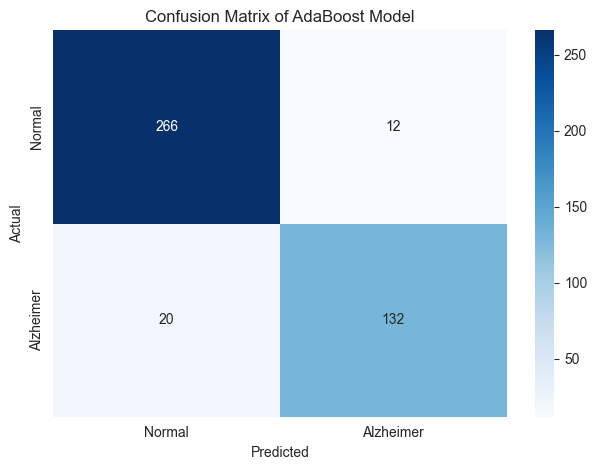

In [33]:
# GOAL:
# Train and evaluate an AdaBoost classifier using decision stumps to improve accuracy by focusing on previous errors.

# EXPLANATION:
# Initialize AdaBoost with DecisionTreeClassifier(max_depth=3) as the weak learner and 20 estimators.
# Fit the model on training data, record training time.
# Predict on test data and evaluate accuracy, classification report, and confusion matrix.
# Visualize confusion matrix as heatmap for clear interpretation.

AdaBoost_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=3, random_state=42),
    n_estimators=20,
    random_state=42
)

start_time = time.time()
AdaBoost_model.fit(X_train, y_train)
train_time = time.time() - start_time

y_pred = AdaBoost_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
print("Training Time:", train_time)
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Alzheimer'],
            yticklabels=['Normal', 'Alzheimer'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of AdaBoost Model')

plt.tight_layout()
plt.show()


## Naive Bayes Model

Accuracy: 77.20930232558139
Training Time: 0.008628368377685547
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       278
           1       0.67      0.70      0.68       152

    accuracy                           0.77       430
   macro avg       0.75      0.76      0.75       430
weighted avg       0.77      0.77      0.77       430



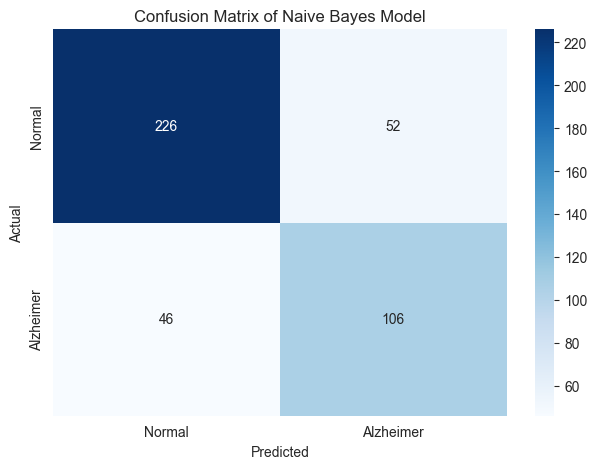

In [34]:
# GOAL:
# Train and evaluate a Gaussian Naive Bayes classifier, a fast probabilistic model assuming feature independence.

# EXPLANATION:
# Initialize GaussianNB model suitable for normally distributed features.
# Fit the model on training data and measure training time.
# Predict on test data, then evaluate using accuracy, classification report, and confusion matrix.
# Visualize the confusion matrix with a heatmap for clarity.

naive_bayes_model = GaussianNB()

start_time = time.time()
naive_bayes_model.fit(X_train, y_train)
train_time = time.time() - start_time

y_pred = naive_bayes_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
print("Training Time:", train_time)
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Alzheimer'],
            yticklabels=['Normal', 'Alzheimer'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Naive Bayes Model')

plt.tight_layout()
plt.show()


## XGBoost Model

Accuracy: 94.88372093023256
Training Time: 0.3967936038970947
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       278
           1       0.95      0.91      0.93       152

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.94       430
weighted avg       0.95      0.95      0.95       430



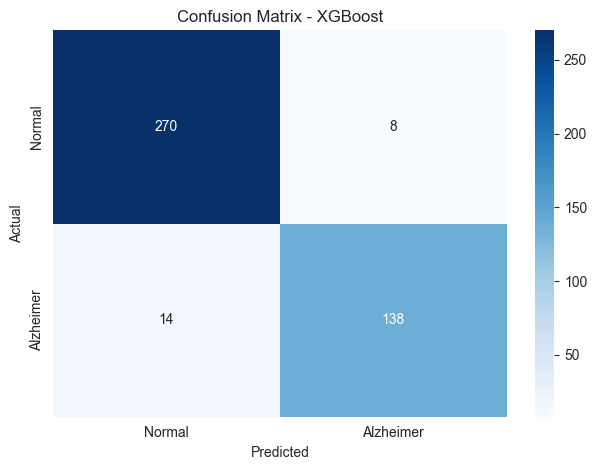

In [35]:
# GOAL:
# Train and evaluate an XGBoost classifier, a fast and accurate gradient boosting model, on Alzheimer's classification.

# EXPLANATION:
# Initialize XGBClassifier with tuned hyperparameters to balance performance and overfitting.
# Fit on training data, record training time.
# Predict on test data and evaluate with accuracy, classification report, and confusion matrix.
# Visualize confusion matrix using a heatmap for clear insight.

xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

start_time = time.time()
xgb_model.fit(X_train, y_train)
train_time = time.time() - start_time

y_pred = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
print("Training Time:", train_time)
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Alzheimer'],
            yticklabels=['Normal', 'Alzheimer'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')

plt.tight_layout()
plt.show()


## BaggingClassifier

Accuracy: 93.48837209302326
Training Time: 5.747613906860352
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       278
           1       0.95      0.86      0.90       152

    accuracy                           0.93       430
   macro avg       0.94      0.92      0.93       430
weighted avg       0.94      0.93      0.93       430



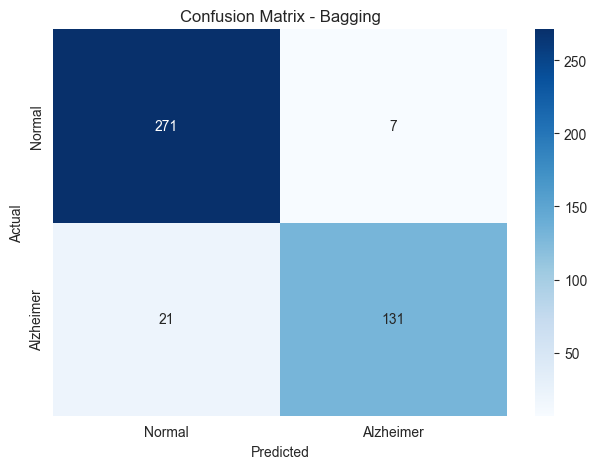

In [36]:
# GOAL:
# Train and evaluate a Bagging classifier that reduces variance by averaging multiple Decision Trees trained on random subsets.

# EXPLANATION:
# Define a Decision Tree as the base estimator with limited depth.
# Initialize BaggingClassifier with 50 base estimators, each trained on 80% of samples and features.
# Fit on training data, record training time.
# Predict on test data, evaluate with accuracy, classification report, and confusion matrix.
# Visualize confusion matrix with a heatmap.

base_estimator = DecisionTreeClassifier(max_depth=4, random_state=42)

Bagging_model = BaggingClassifier(
    estimator=base_estimator,
    n_estimators=50,
    max_samples=0.8,
    max_features=0.8,
    random_state=42,
    n_jobs=-1
)

start_time = time.time()
Bagging_model.fit(X_train, y_train)
train_time = time.time() - start_time

y_pred = Bagging_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
print("Training Time:", train_time)
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Alzheimer'],
            yticklabels=['Normal', 'Alzheimer'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Bagging')

plt.tight_layout()
plt.show()


## StackingClassifier

Accuracy: 94.18604651162791
Training Time: 2.4257473945617676
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       278
           1       0.92      0.91      0.92       152

    accuracy                           0.94       430
   macro avg       0.94      0.94      0.94       430
weighted avg       0.94      0.94      0.94       430



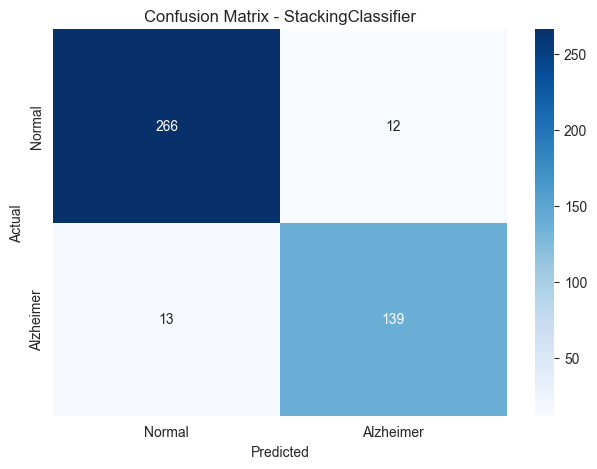

In [37]:
# GOAL:
# Train and evaluate a Stacking Classifier that combines multiple base models and uses a meta-model to improve overall performance.

# EXPLANATION:
# Define base learners: Logistic Regression, Random Forest, and KNN.
# Define a Logistic Regression meta-model to learn from base learners' predicted probabilities.
# Initialize StackingClassifier with these models, enabling passthrough of original features.
# Fit on training data and record training time.
# Predict on test data, evaluate with accuracy, classification report, and confusion matrix.
# Visualize confusion matrix with a heatmap.

base_learners = [
    ('lr', LogisticRegression(solver='liblinear', max_iter=10000, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]

final_estimator = LogisticRegression()

Stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=final_estimator,
    stack_method='predict_proba',
    n_jobs=-1,
    passthrough=True
)

start_time = time.time()
Stacking_model.fit(X_train, y_train)
train_time = time.time() - start_time

y_pred = Stacking_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
print("Training Time:", train_time)
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Alzheimer'],
            yticklabels=['Normal', 'Alzheimer'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - StackingClassifier')

plt.tight_layout()
plt.show()


# Final Model Comparison and Selection

--- Final Model Performance Comparison ---
                              F1-Score  Accuracy
Model                                           
XGBoost                          92.62     94.88
Random Forest                    92.26     94.65
Stacking Classifier              91.75     94.19
Bagging Classifier               90.34     93.49
Decision Tree                    90.20     93.02
AdaBoost                         89.19     92.56
Support Vector Machine (SVM)     74.42     82.09
Logistic Regression              73.68     81.40
Gaussian Naive Bayes             68.39     77.21
K-Nearest Neighbors (KNN)        57.25     74.65


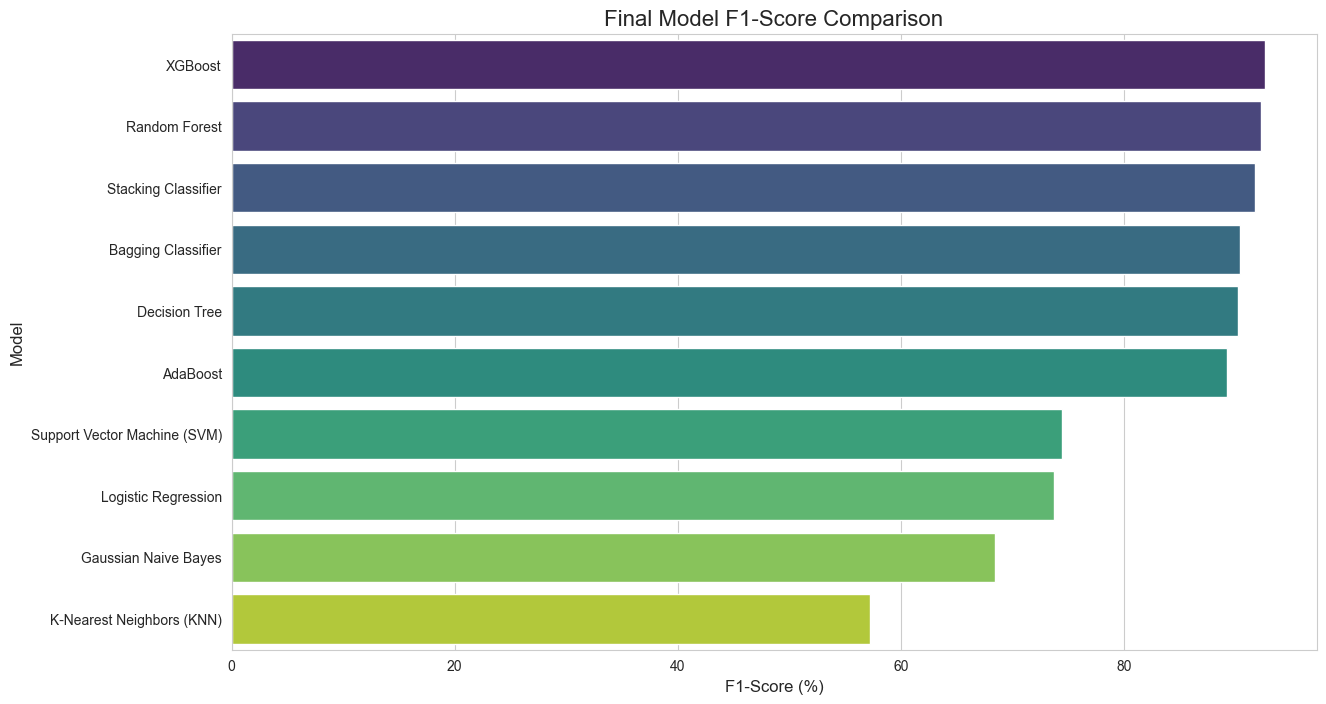

In [38]:
# GOAL:
# Compare performance of all trained models by calculating F1-Score and Accuracy,
# consolidate results in a DataFrame, and visualize for easy model ranking.

# EXPLANATION:
# Predict test labels for each model to ensure consistent evaluation.
# Store model names with their F1-scores and accuracy in a dictionary.
# Convert to DataFrame, sort by F1-score descending to highlight best models.
# Print formatted results and plot F1-score comparison as a horizontal bar chart.

y_pred_log_reg = logistic_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_dt = DT_model.predict(X_test)
y_pred_rf = RF_model.predict(X_test)
y_pred_gnb = naive_bayes_model.predict(X_test)
y_pred_ada = AdaBoost_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_bag = Bagging_model.predict(X_test)
y_pred_stack = Stacking_model.predict(X_test)

all_models = {
    'Model': [
        'Logistic Regression', 'Support Vector Machine (SVM)', 'K-Nearest Neighbors (KNN)',
        'Decision Tree', 'Random Forest', 'AdaBoost', 'Gaussian Naive Bayes',
        'XGBoost', 'Bagging Classifier', 'Stacking Classifier'
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_log_reg), f1_score(y_test, y_pred_svm), f1_score(y_test, y_pred_knn),
        f1_score(y_test, y_pred_dt), f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_ada),
        f1_score(y_test, y_pred_gnb), f1_score(y_test, y_pred_xgb), f1_score(y_test, y_pred_bag),
        f1_score(y_test, y_pred_stack)
    ],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log_reg), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_ada),
        accuracy_score(y_test, y_pred_gnb), accuracy_score(y_test, y_pred_xgb), accuracy_score(y_test, y_pred_bag),
        accuracy_score(y_test, y_pred_stack)
    ]
}

performance_df = pd.DataFrame(all_models).set_index('Model').sort_values(by='F1-Score', ascending=False)

print("--- Final Model Performance Comparison ---")
print((performance_df * 100).round(2))

plt.figure(figsize=(14, 8))
sns.barplot(x=performance_df['F1-Score'] * 100, y=performance_df.index, palette='viridis')
plt.title('Final Model F1-Score Comparison', fontsize=16)
plt.xlabel("F1-Score (%)", fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.show()


## Conclusion and Future Work

XGBoost achieved the best results in terms of F1-Score, outperforming all other models. Random Forest and Bagging also showed strong performance.

This confirms the strength of ensemble methods in predicting Alzheimer’s diagnosis.

### Next Steps:
- Perform hyperparameter tuning (GridSearchCV, RandomizedSearchCV)
- Try new feature combinations or engineered features
- Test deep learning models for capturing non-linear patterns